In [3]:
import matplotlib.pyplot as plt
import urllib
import pymc as pm

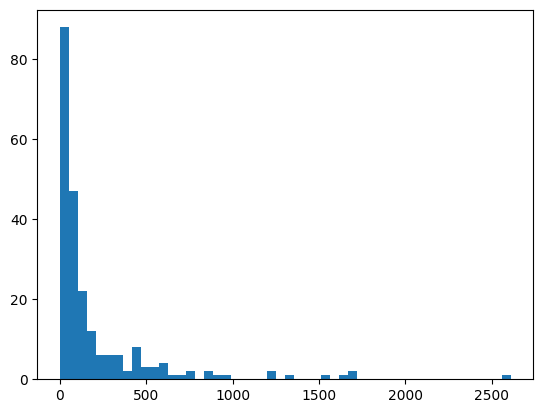

In [2]:

url = 'https://www.oreilly.co.jp/pub/9784873119168/data/time-on-page.csv'
reponse = urllib.request.urlopen(url)
data = [int(row.strip()) for row in reponse.readlines()]
plt.hist(data, bins = 50)
plt.show()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]


/Users/mori/GIT/forMori/MAB_AtoZ/.mab_simulator/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


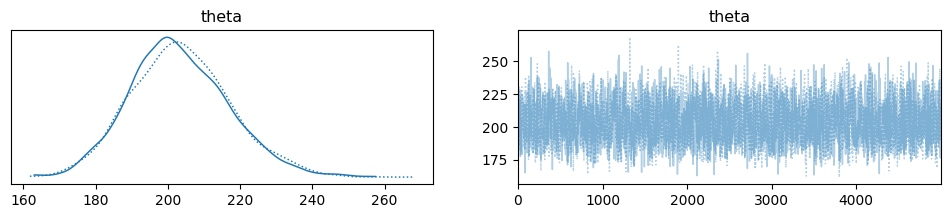

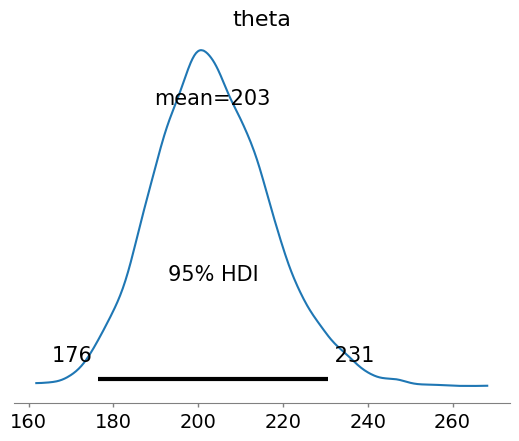

In [11]:
with pm.Model() as model:
    theta = pm.Uniform('theta', lower=0, upper=3000)
    obs = pm.Exponential('obs', lam=1/theta, observed=data)
    trace = pm.sample(5000, chains=2)

    pm.plot_trace(trace)
    pm.plot_posterior(trace, hdi_prob=0.95)